<h3>Lab Assignment 2 - Classification</h3>
<h4>Garnett Grant</h4>
<h4>301188923</h4>

In [ ]:
## Pre-requisite to carrying out the assignment:
## 1. From Sklearn load the MINST dataset, using fetch_openml.
from sklearn.datasets import fetch_openml
import sklearn as sl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

## Load & check the data:

In [ ]:

## 1. Load the MINST data into a pandas dataframe named MINST_firstname where first name is you name.
mnist_garnett = fetch_openml('mnist_784', version=1)

In [ ]:
## 2. List the keys
mnist_garnett.keys()

In [ ]:
## 3. Assign the data to a ndarray named X_firstname where firstname is your first name.
X_garnett = mnist_garnett["data"].values
X_garnett

In [ ]:
## 4. Assign the target to a variable named y_firstname where firstname is your first name.
y_garnett = mnist_garnett["target"].values.astype(int)
y_garnett

In [ ]:
##5. Print the types of X_firstname and y_firstname.
print(type(X_garnett))
print(type(y_garnett))

In [ ]:
## 6. Print the shape of X_firstname and y_firstname.
print(f"X_garnett Shape: {X_garnett.shape}")
print(f"y_garnett Shape: {y_garnett.shape}")


In [170]:
##7. Create three variables named as follows:
##      a. If your first name starts by “A” through “L” name the variable some_digit1, some_digit2, some_digit3. 
##         Store in these variables the values from X_firstname indexed 7,5,0 in order.
some_digit1, some_digit2, some_digit3 = X_garnett[7], X_garnett[5], X_garnett[0]



In [169]:
## 8. Use imshow method to plot the values of the three variables you defined in the above point. Note the values in your Analysis report (written response).

##Data must first be reshaped and then plotted
some_digit1_image, some_digit2_image, some_digit3_image = some_digit1.reshape(28,28), some_digit2.reshape(28,28), some_digit3.reshape(28,28)

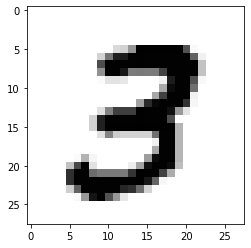

In [175]:
## Image 1
plt.imshow(some_digit1_image, cmap=mpl.cm.binary)

In [ ]:
## Image 2
plt.imshow(some_digit2_image, cmap=mpl.cm.binary)

In [ ]:
## Image 3
plt.imshow(some_digit3_image, cmap=mpl.cm.binary)

## Pre-process the data:


In [ ]:
## 9. Change the type of y to uint8
y_garnett.dtype = "uint8"

In [ ]:
## 10.	The current target values range from 0 to 9 i.e. 10 classes. Transform the target variable to 3 classes as follows:
##      a.	Any digit between 0 and 3 inclusive should be assigned a target value of 0
##      b.	Any digit between 4 and 6 inclusive should be assigned a target value of 1
##      c.	Any digit between 7 and 9 inclusive should be assigned a target value of 9 
##      (Hint: you can use numpy.where to carry out the transformation on the target.)
# y_garnett
y_garnett_transformed = np.where((y_garnett >= 0) & (y_garnett <= 3), 0, np.where((y_garnett >= 4) & (y_garnett <= 6), 1, 9))
pd.DataFrame(y_garnett)
pd.DataFrame(y_garnett_transformed)


In [162]:
## 11.	Print the frequencies of each of the three target classes and note it in your written report in addition provide a screenshot showing a bar chart.

ygt_0_count = np.count_nonzero(y_garnett_transformed == 0)
ygt_1_count = np.count_nonzero(y_garnett_transformed == 1)
ygt_9_count = np.count_nonzero(y_garnett_transformed == 9)

print(f"y_garnett_transformed 0 Count: {ygt_0_count}\ny_garnett_transformed 1 Count: {ygt_1_count}\ny_garnett_transformed 9 count: {ygt_9_count}")



y_garnett_transformed 0 Count: 238911
y_garnett_transformed 1 Count: 20013
y_garnett_transformed 9 count: 21076


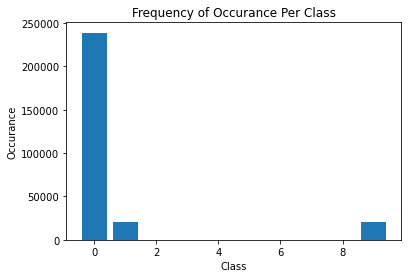

In [168]:

frequency = [10000,50000,100000,150000,200000,250000]
occurrences = [ygt_0_count,ygt_1_count,ygt_9_count]
classes = [0,1,9]

# plt.bar(occurrences, frequency, color='blue')

plt.bar(x=classes,height=occurrences)

plt.xlabel('Class')
plt.ylabel('Occurance')
plt.title('Frequency of Occurance Per Class')
# tick_positions = [0,1,2,3,4,5,6,7,8,9,10]
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
# plt.yticks([20000,60000,100000,140000,180000,220000,260000])

plt.show()

In [201]:
## 12.	Split your data into train, test. Assign the first 50,000 records for training and the last 20,000
## records for testing. (Hint you don’t need sklearn train test as the data is already randomized).
X_garnett_train, X_garnett_test, y_garnett_train, y_garnett_test = X_garnett[:50000], X_garnett[-20000:], y_garnett_transformed[:50000],y_garnett_transformed[-20000:]

X_garnett_train.size, X_garnett_test.size, y_garnett_train.size, y_garnett_test.size

(39200000, 15680000, 50000, 20000)

## Build Classification Models:

<blockquote><h3>Naive Bayes</h3></blockquote>

In [213]:
##13. Train a Naive Bayes classifier using the training data. Name the classifier NB_clf_firstname.
from sklearn.naive_bayes import GaussianNB, CategoricalNB,MultinomialNB, ComplementNB
NB_clf_garnett = ComplementNB()

NB_clf_garnett.fit(X_garnett_train,y_garnett_train)

ComplementNB()

In [214]:
## 14. Use 3-fold cross validation to validate the training process, and note the results in your written response.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_clf_garnett, X_garnett_train, y_garnett_train, cv=3, scoring="accuracy")
print ('All scores:', scores)
print  ('Average score:', scores.mean() * 100)

All scores: [0.57334853 0.50380992 0.5424817 ]
Average score: 53.98800520329448


<blockquote><h3>Logisitic Regression</h3></blockquote>

In [ ]:
#18. Train a Logistic regression classifier using the same training data. Name the classifier LR_clf_firstname. 
 
    #(Note this is a multi-class problem make sure to check all the parameters and set multi_class='multinomial').
    
    #Try training the classifier using two solvers first “lbfgs” then “Saga”. Set max_iter to 1200 and tolerance to 0.1 in both cases.
    
    #Make sure you note the results in both cases in your written response, and note the main differences in your #written response. Carryout a quick research on the difference between the “lbfgs” and “Saga” solvers and see #how this applies to the results, note that size and dimensions of the dataset. Don’t worry if one doesn’t converge your research should explain why. Note the results of your research in your analysis report.



In [ ]:
#19. Use 3-fold cross validation on the training data and note the results in your written response.

In [ ]:
#20. Use the model to score the accuracy against the test data, note the result in your written response.

In [ ]:
# 21. Generate the Generate the accuracy matrix precision and recall of the model and note them in your written response.

In [ ]:
# 22. Use the classifier that worked from the above point to predict the three variables you defined in point 7 above. Note the results in your written response and compare against the actual results